# Video example

Simple example of subsampled dynamic-foreground/static-background video seperation.


In [1]:
import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
import cv2

from nopt.transforms import *
from nopt.constraints import *
from nopt.problems import *
from nopt.solvers import *

In [2]:
frames = []

path = "../data/dataset_shop.avi"
cap = cv2.VideoCapture(path)
ret = True
while ret:
    ret, img = cap.read() # read one frame from the 'capture' object; img is (H, W, C)
    if ret:
        frames.append(img)
video = np.stack(frames, axis=0) # dimensions (T, H, W, C)

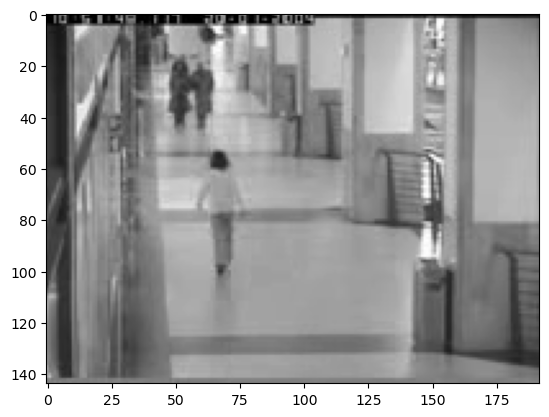

In [3]:
plt.imshow(cv2.cvtColor(video[50,:,:,:], cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
T = video.shape[0]
H = video.shape[1]
W = video.shape[2]
C = video.shape[3]


rho_r = 0.01
rho_s = 0.1
delta = 0.5

m = T
n = H*W
p = round(delta*m*n)
s = round(rho_s*p)
alpha = s/(m*n)
r = round(.5*( m+n - np.sqrt( (m+n)**2 - 4*rho_r*p ) ))
print(str(r) +','+ str(s))

HTr = FixedRank(r, (m,n))
HTs = Sparsity(s)

# Prepare transform
A = FastJLT((p, H * W * T))

video_mat = video.reshape((T, -1, C))
bs = []
for band in range(C):
    bs.append(A.matvec(video_mat[:,:,band].flatten()))

1,217037


In [5]:
solver = NAHT(logverbosity = 2, maxiter = 20, verbosity = 2)
problem = LinearProblemSum(A, bs[0], (HTr, HTs))

In [6]:
x, opt_log = solver.solve(problem)

 iter		   obj. value	    grad. norm
    1	+1.6226288843711245e+08	3.97690347e+04
    2	+8.1655942700477317e+07	1.65337828e+04
    3	+4.8725400150842302e+07	1.21194189e+04
    4	+3.3737283553618506e+07	9.34933604e+03
    5	+2.6834179373781387e+07	7.85716203e+03
    6	+2.3748489332245134e+07	7.09983612e+03
    7	+2.2151188705949098e+07	6.74303120e+03
    8	+2.1223441206880726e+07	6.55483964e+03
    9	+2.0618449434227530e+07	6.44180783e+03
   10	+2.0190419486315683e+07	6.36744444e+03
   11	+1.9867235633324772e+07	6.31345957e+03
   12	+1.9613099219602250e+07	6.27138668e+03
   13	+1.9417069826351076e+07	6.23797140e+03
   14	+1.9259260401613947e+07	6.21182185e+03
   15	+1.9132220435455594e+07	6.19040936e+03
   16	+1.9031144938610125e+07	6.17313676e+03
   17	+1.8948765406238306e+07	6.15923721e+03
   18	+1.8879283124223132e+07	6.14773144e+03
   19	+1.8818924928837024e+07	6.13785937e+03
   20	+1.8765502815378003e+07	6.12907609e+03
Terminated - max iterations reached after 16.88 seconds.



In [7]:
opt_log['iterations'].keys()

dict_keys(['iteration', 'time', 'fx', 'xdist'])

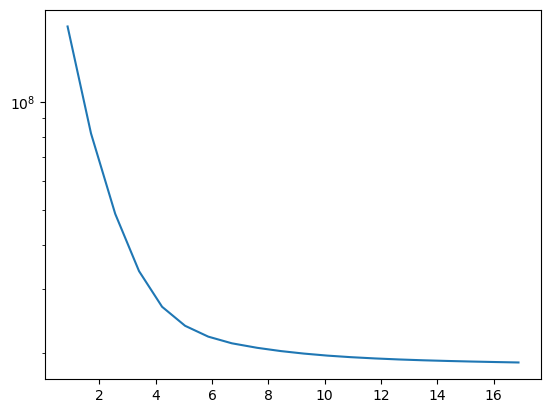

In [8]:
plt.semilogy(opt_log['iterations']['time'], opt_log['iterations']['fx'])

In [9]:
L = x[0].reshape(T, H, W, 1)
S = x[1].reshape(T, H, W, 1)

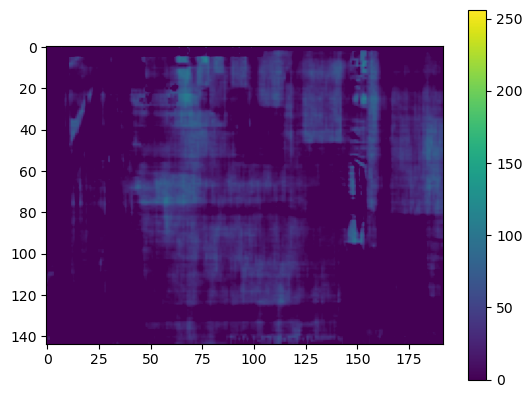

In [10]:
plt.imshow(L[50,:,:,:], vmin = 0, vmax = 256)
plt.colorbar()

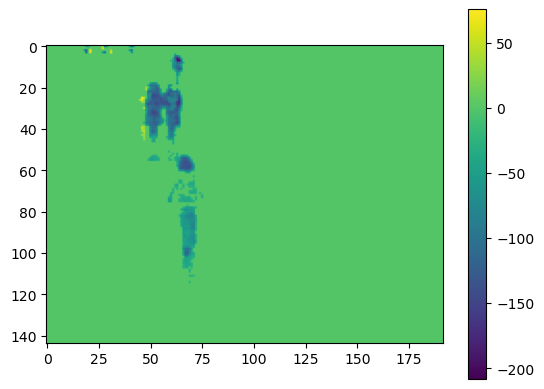

In [11]:
plt.imshow(S[50,:,:,:])
plt.colorbar()